In [ ]:
from spikeinterface import create_sorting_analyzer
from spikeinterface import create_sorting_analyzer
from spikeinterface.curation import compute_merge_unit_groups

import spikeinterface as si
import numpy as np

# Correct import path
from spikeinterface.generation import generate_drifting_recording

# Generate synthetic drifting recording
recording, rec_drift, sorting = generate_drifting_recording(duration=120)

analyzer = create_sorting_analyzer(sorting=sorting, recording=recording)

# some extensions are required
analyzer.compute(["random_spikes", "templates", "template_similarity", "correlograms", "noise_levels"])
analyzer.compute("unit_locations", method="monopolar_triangulation")
analyzer.compute("random_spikes", method="uniform", max_spikes_per_unit=500)
analyzer.compute("waveforms", n_jobs=-1, chunk_duration="1s")
analyzer.compute("templates")
analyzer.compute("correlograms", window_ms=100.0, bin_ms=1.0)
analyzer.compute("spike_amplitudes")
analyzer.compute("unit_locations")

/opt/anaconda3/envs/sorter/lib/python3.14/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
estimate_sparsity (no parallelization): 100%|██████████| 120/120 [00:12<00:00,  9.83it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 120/120 [00:18<00:00,  6.37it/s]
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
noise_level (no parallelization): 100%|██████████| 20/20 [00:03<00:00,  5.82it/s]


In [ ]:
# Manual Sorting
# remove some units
remove_unit_ids = [1, 2]
sorting_analyzer2 = analyzer.remove_units(remove_unit_ids=remove_unit_ids)

# merge units 4 and 5, and separately merge units 7, 8 and 12
merge_unit_groups = [[4, 5], [7, 8, 12]]
sorting_analyzer3 = sorting_analyzer2.merge_units(
    merge_unit_groups=merge_unirt_groups,
    censored_period_ms=0.5,
    merging_mode="soft"
)

In [14]:
# merges is a list of unit pairs, with unit_ids to be merged.
merge_groups = compute_merge_unit_groups(
    sorting_analyzer=analyzer,
    preset="feature_neighbors",
    steps_params={
        # names can vary slightly by version, but this is the intent:
        "unit_locations": {"max_distance_um": 150},
        "template_similarity": {"similarity_method": "l1", "template_diff_thresh": 0.25},
    },
)

merge_groups

spike_amplitudes (no parallelization): 100%|██████████| 120/120 [00:21<00:00,  5.62it/s]


[[np.str_('1'),
  np.str_('2'),
  np.str_('3'),
  np.str_('4'),
  np.str_('5'),
  np.str_('6'),
  np.str_('7'),
  np.str_('8'),
  np.str_('9'),
  np.str_('10'),
  np.str_('11'),
  np.str_('12'),
  np.str_('13'),
  np.str_('14'),
  np.str_('15'),
  np.str_('16'),
  np.str_('17'),
  np.str_('18'),
  np.str_('19'),
  np.str_('20'),
  np.str_('21'),
  np.str_('22'),
  np.str_('23'),
  np.str_('24'),
  np.str_('25'),
  np.str_('26'),
  np.str_('27'),
  np.str_('28'),
  np.str_('30'),
  np.str_('31'),
  np.str_('32'),
  np.str_('33'),
  np.str_('34'),
  np.str_('35'),
  np.str_('36'),
  np.str_('37'),
  np.str_('38'),
  np.str_('39'),
  np.str_('40'),
  np.str_('42'),
  np.str_('43'),
  np.str_('44'),
  np.str_('45'),
  np.str_('46'),
  np.str_('47'),
  np.str_('48'),
  np.str_('49'),
  np.str_('50'),
  np.str_('51'),
  np.str_('52'),
  np.str_('54'),
  np.str_('55'),
  np.str_('56'),
  np.str_('57'),
  np.str_('58'),
  np.str_('59'),
  np.str_('60'),
  np.str_('62'),
  np.str_('64'),
  np.s

In [2]:
from spikeinterface.curation import auto_merge_units

template_diff_thresh = [0.05, 0.15, 0.25]
presets = ["x_contaminations"] * len(template_diff_thresh)
steps_params = [
    {"template_similarity": {"template_diff_thresh": i}}
    for i in template_diff_thresh
]

analyzer_merged = auto_merge_units(
    analyzer,
    presets=presets,
    steps_params=steps_params,
    recursive=True
)

In [4]:
analyzer.save_as(format = "zarr", folder = "/Users/marco/Cursor_Folder/Cursor_Codespace/realtime_sorting/data/analyzer")

SortingAnalyzer: 128 channels - 250 units - 1 segments - zarr - sparse - has recording
Loaded 6 extensions: random_spikes, templates, template_similarity, correlograms, noise_levels, unit_locations

In [15]:
!sigui --mode=web --curation "/Users/marco/Cursor_Folder/Cursor_Codespace/realtime_sorting/data/analyzer.zarr"

Found available port: 51432
Launching server at http://localhost:51432
^C


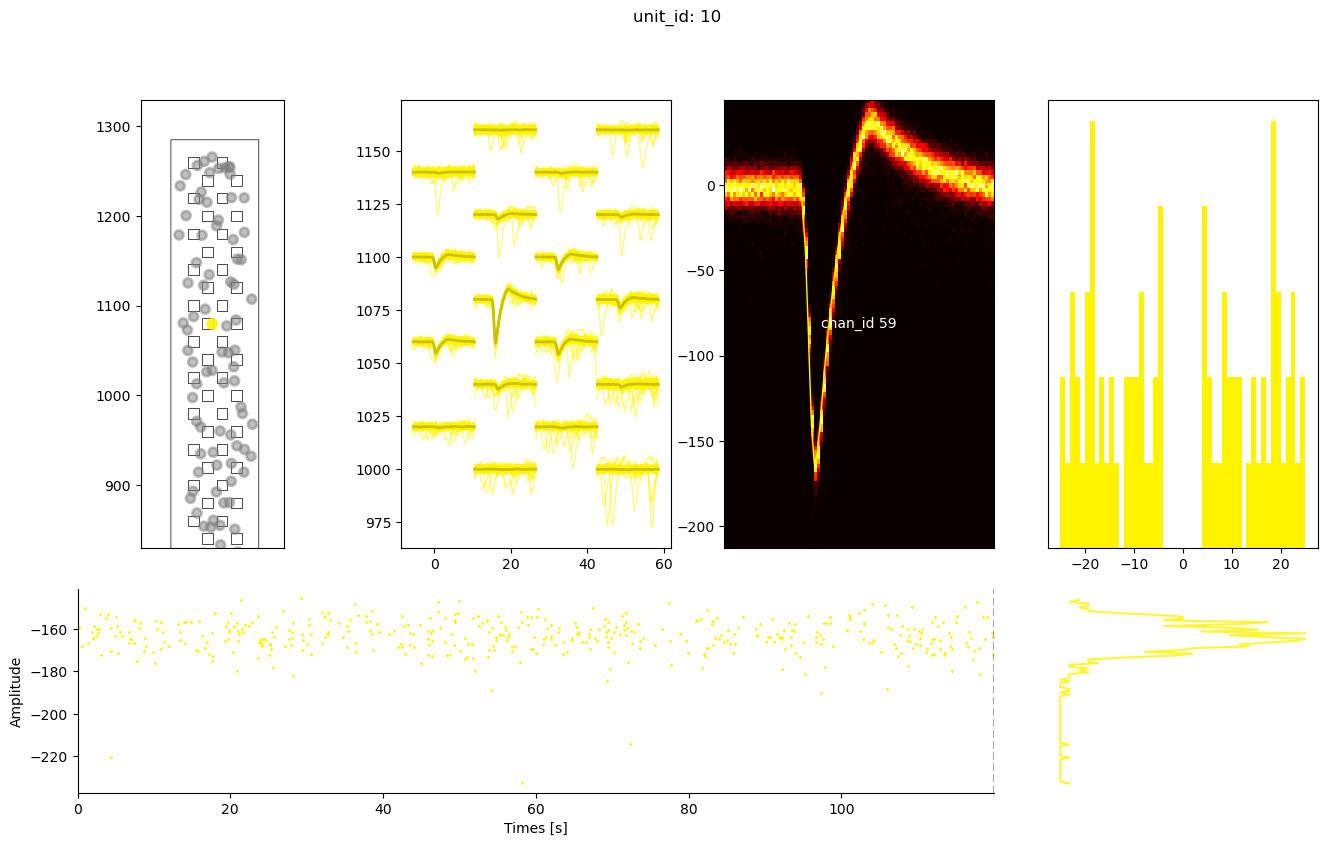

In [ ]:
import spikeinterface.widgets as sw

analyzer = analyzer
unit_id = "10"  # keep string if your unit ids are strings

# ---- compute prerequisites (only if missing) ----
exts = analyzer.get_loaded_extension_names()

if "random_spikes" not in exts:
    analyzer.compute("random_spikes", method="uniform", max_spikes_per_unit=500)

if "waveforms" not in exts:
    analyzer.compute("waveforms", n_jobs=-1, chunk_duration="1s")

if "templates" not in exts:
    analyzer.compute("templates")

if "correlograms" not in exts:
    analyzer.compute("correlograms", window_ms=100.0, bin_ms=1.0)

if "spike_amplitudes" not in exts:
    analyzer.compute("spike_amplitudes")

if "unit_locations" not in exts:
    try:
        analyzer.compute("unit_locations")
    except Exception as e:
        print("unit_locations compute failed (ok to ignore if no geometry):", repr(e))

In [91]:
type(w.figure)

matplotlib.figure.Figure

In [16]:
from pathlib import Path
fig_dir = Path(r"/Users/marco/Cursor_Folder/Cursor_Codespace/realtime_sorting/data/figs")
fig_dir.mkdir(parents = True, exist_ok = True)

# for id in analyzer.unit_ids:
#     w = sw.plot_unit_summary(
#     analyzer,
#     unit_id=id,
#     backend="matplotlib",
#     ncols=5,
#     figsize=(16, 9),
#     figtitle=f"Unit summary: {unit_id}"
#     )

#     w.figure.savefig(
#         Path(fig_dir, f"{id}-figure")
#     )